Volume of cell: 1056.622886347127 A^3
Found spin polarised system...
Number of electrons in system: 544
Energy gap of system: 5.904 eV
Temperature: 1500.0 K
Number of defect species: 13
Reading spin-polarised DOS
Volume of cell: 1056.622886347127 A^3
Found spin polarised system...
Number of electrons in system: 544
Energy gap of system: 5.904 eV
Temperature: 1500.0 K
Number of defect species: 13
Reading spin-polarised DOS
Volume of cell: 1056.622886347127 A^3
Found spin polarised system...
Number of electrons in system: 544
Energy gap of system: 5.904 eV
Temperature: 1500.0 K
Number of defect species: 13
Reading spin-polarised DOS
Volume of cell: 1056.622886347127 A^3
Found spin polarised system...
Number of electrons in system: 544
Energy gap of system: 5.904 eV
Temperature: 1500.0 K
Number of defect species: 13


/home/alex/anaconda3/lib/python3.6/site-packages/scipy/optimize/_minimize.py:763: RuntimeWarning: Method 'bounded' does not support relative tolerance in x; defaulting to absolute tolerance.
  "defaulting to absolute tolerance.", RuntimeWarning)
/mnt/c/Users/Alex/Materials_work/new_fermi/py-sc-fermi/py_sc_fermi/defect_charge_state.py:79: RuntimeWarning: overflow encountered in exp
  return self.degeneracy * np.exp(expfac)
/home/alex/anaconda3/lib/python3.6/site-packages/scipy/optimize/optimize.py:1762: RuntimeWarning: invalid value encountered in double_scalars
  p = (xf - fulc) * q - (xf - nfc) * r
/home/alex/anaconda3/lib/python3.6/site-packages/scipy/optimize/optimize.py:1763: RuntimeWarning: invalid value encountered in double_scalars
  q = 2.0 * (q - r)


Reading spin-polarised DOS


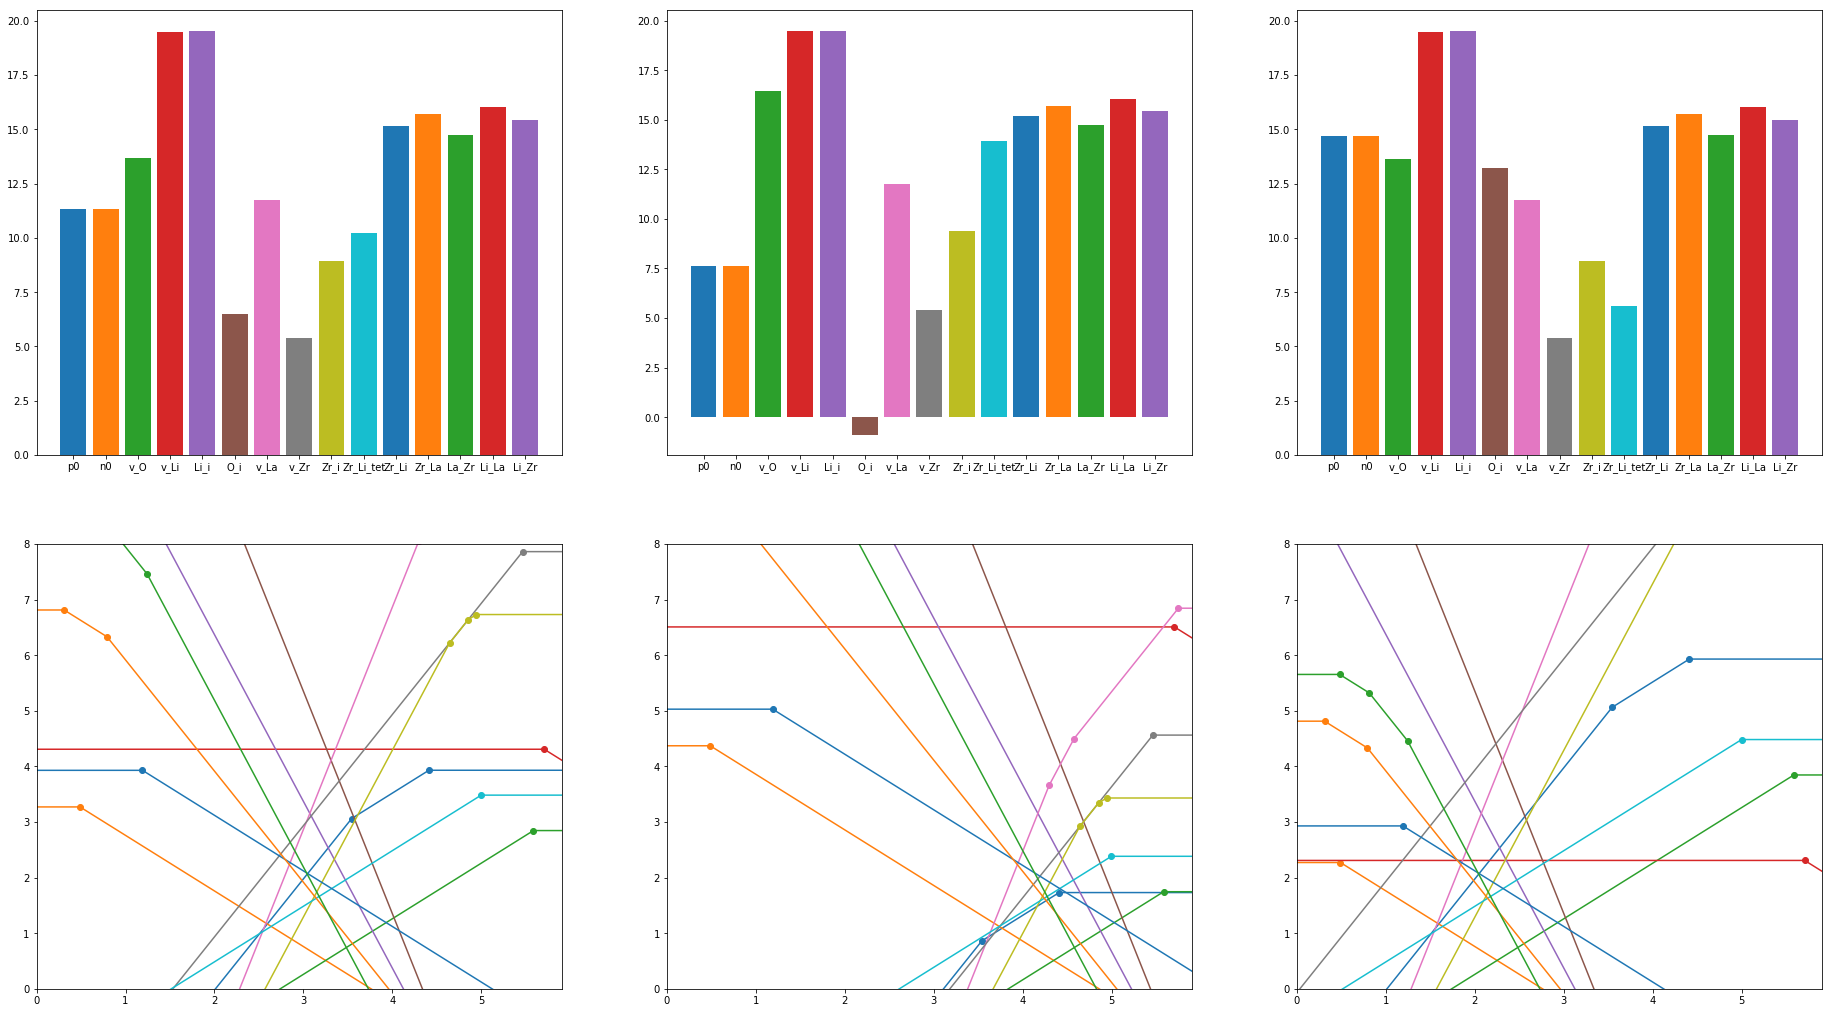

In [9]:
# py-sc-fermi

import timeit

start = timeit.default_timer()

from py_sc_fermi.defect_system import DefectSystem
from py_sc_fermi.defect_species import DefectSpecies
from py_sc_fermi.inputs import inputs_from_files

import numpy as np

import sc_pyper_functions as scpf
import pandas as pd


defects = scpf.import_calculations_from_file('defects.yaml')
elements = scpf.import_calculations_from_file('elements.yaml')
interest = scpf.import_calculations_from_file('interest.yaml')
grid = (pd.read_csv('grid.dat', skiprows=10, sep='\s+'))  # 'grid' refers to a stability region divded into a grid of approximatley 80 points
ex_grid = (pd.read_csv('ex_grid.dat', skiprows=10, sep='\s+'))

import yaml

with open('automator_config.yaml', 'r') as stream:
    try:
        a = yaml.safe_load(stream)
    except yaml.YAMLError as exc:
        print(exc)

def make_all_defects(config_dict,chem_pots):
    to_write = []
    defs = []
    for k,v in config_dict['defects'].items():
        label = [i for i in config_dict['defects'][k][1:]]
        to_calcs = [defects[i] for i in label]
        out = scpf.make_defect(to_calcs, elements, interest['LLZO'], delta_mu=chem_pots, corr=config_dict['iccs'], sites=1)
        out.n_sites = config_dict['defects'][out.label][0]
        #print(out)
        defs.append(out)
    return defs


unitcell_filename = 'unitcell.dat'
totdos_filename = 'totdos.dat'
input_fermi_filename = 'input-fermi.dat'

inputs = inputs_from_files(unitcell_filename=unitcell_filename, 
                           input_fermi_filename=input_fermi_filename, 
                           totdos_filename=totdos_filename)

examples =  (75,12,42)  

tls = []
ex = []
for i in examples:
    b = make_all_defects(a,grid.iloc[i].to_dict())

    scf = scpf.SCFermi( b, a['nelect'], a['e_gap'], 1500, a['spin_polarised'])
    scf.output()
    
    defect_system = DefectSystem( defect_species=inputs['defect_species'],
                                  volume=inputs['volume'],
                                  dos=inputs['dos'],
                                  temperature=inputs['temperature'])

    #print(defect_system)

    unitcell_filename = 'unitcell.dat'
    totdos_filename = 'totdos.dat'
    input_fermi_filename = 'input-fermi.dat'

    inputs = inputs_from_files(unitcell_filename=unitcell_filename, 
                                   input_fermi_filename=input_fermi_filename, 
                                   totdos_filename=totdos_filename)
    
    out = defect_system.to_dict()
    out_tls = defect_system.get_transition_levels()
    ex.append(out)
    tls.append(out_tls)
          
import matplotlib.pyplot as plt
import numpy as np

fig, axs = plt.subplots(2,3, figsize =(32,18))
axs=axs.flatten()
for j,i in enumerate(ex):
    ax=axs[j]
    for k,v in i.items():
        if k != 'Fermi Energy':
            ax.bar(k,np.log10(v))

for j,i in enumerate(tls):
    ax=axs[j+3]
    for tl in i.values():
        ax.plot(tl[0],tl[1], '-o', label=i)
    ax.set_xlim(0,5.904)
    ax.set_ylim(0,8)
plt.show()

In [4]:
from py_sc_fermi.defect_charge_state import FrozenDefectChargeState

# example_dir = 'example_inputs'

# unitcell_filename = 'unitcell.dat'
# totdos_filename = 'totdos.dat'
# input_fermi_filename = 'input-fermi.dat'

# # TODO: Update the inputs.read_input_data() function to handle frozen-sc-fermi input files.
# inputs = inputs_from_files(unitcell_filename=unitcell_filename, 
#                            input_fermi_filename=input_fermi_filename, 
#                            totdos_filename=totdos_filename)

# defect_system = DefectSystem( defect_species=inputs['defect_species'],
#                               volume=inputs['volume'],
#                               dos=inputs['dos'], # py_sc_fermi.DOS object,
#                               temperature=300.0 )

# defect_system

# from collections import Counter
# nfrozen = 1
# namef = ['v_Li']
# concf = [0.3285677364522e20]
# # check frozen defects are included in the original list of defects
# for name in namef:
#     if name not in defect_system.defect_species_names:
#         raise ValueError((f'ERROR: fixed concentration defect "{name}"'+
#                            'is not in list of original defects!\n'+
#                            'Please add new frozen defects as fixed charge defects in'
#                            'a separate list - otherwise a solution cannot be found!!'))
# # Check if any defects have been assigned multiple fixed concentrations
# c = Counter(namef)
# for n, count in c.items():
#     if count > 1:
#         raise ValueError(f'ERROR: defect "{n}"has multiple fixed concentrations!!')
# for n, c in zip(namef, concf):
#     defect_system.defect_species_by_name(n).fix_concentration( c * defect_system.volume / 1e24 )
    
# defect_system.report()

ficharg = False
fixconch = False
namefn = ['V_Ga', 'Ga_i']
chargefn = [-1.0, 1.0]
concfn = [0.19e19, 0.5e20]
if 0 in chargefn:
    checkfixchg = True
else:
    checkfixchg = False
for n,q,c  in zip( namefn, chargefn, concfn ):
    print(c)
    c = c * defect_system.volume / 1e24
    frozen_charge_state = FrozenDefectChargeState(charge=q, concentration=c)
    if n in defect_system.defect_species_names:     
        defect_system.defect_species_by_name(n).charge_states[q] = frozen_charge_state
    else:
        ds = DefectSpecies(name=n, nsites=1, charge_states=[frozen_charge_state])
        defect_system.defect_species.append(ds)

defect_system.check_concentrations()
defect_system.to_dict()

1.9e+18
5e+19


/home/alex/anaconda3/lib/python3.6/site-packages/scipy/optimize/_minimize.py:763: RuntimeWarning: Method 'bounded' does not support relative tolerance in x; defaulting to absolute tolerance.
  "defaulting to absolute tolerance.", RuntimeWarning)
/mnt/c/Users/Alex/Materials_work/new_fermi/py-sc-fermi/py_sc_fermi/defect_charge_state.py:79: RuntimeWarning: overflow encountered in exp
  return self.degeneracy * np.exp(expfac)
/home/alex/anaconda3/lib/python3.6/site-packages/scipy/optimize/optimize.py:1762: RuntimeWarning: invalid value encountered in double_scalars
  p = (xf - fulc) * q - (xf - nfc) * r
/home/alex/anaconda3/lib/python3.6/site-packages/scipy/optimize/optimize.py:1763: RuntimeWarning: invalid value encountered in double_scalars
  q = 2.0 * (q - r)


{'Fermi Energy': 2.268876135271157,
 'Ga_i': 5e+19,
 'La_Zr': 1138600187751409.5,
 'Li_La': 4.4451229991332216e+16,
 'Li_Zr': 2.137927217473788e+16,
 'Li_i': 1.576011598661271e+19,
 'O_i': 16536344102331.236,
 'V_Ga': 1.9e+18,
 'Zr_La': 2422751546208918.5,
 'Zr_Li': 168255551662315.53,
 'Zr_Li_tet': 1780158.0407072108,
 'Zr_i': 53806154.49389492,
 'n0': 238043947855379.97,
 'p0': 238043947855379.97,
 'v_La': 4597859133442.098,
 'v_Li': 6.370925377113671e+19,
 'v_O': 10069448064254.527,
 'v_Zr': 4097712.530548102}

In [5]:
from pandas import DataFrame as df
from itertools import product
from tqdm import tqdm
from scipy.constants import physical_constants

kb_e = physical_constants['Boltzmann constant in eV/K'][0]
j_to_ev = 1/physical_constants['electron volt-joule relationship'][0]
S_0 = 205 * j_to_ev / physical_constants['Avogadro constant'][0]
Cp = (7/2)*kb_e

temperature = np.arange(800, 1600, 100)
pressure = np.logspace(-1, -10, num=10)
in_conds = product(pressure,temperature)

def dependance(P,T):
    """
    
    This function gives dependance of mu_O(T,P)
    args: P = pressure (float)
          T = temperature (float)
          
    returning:
          mu_O(T,P) (float)
          
    assuming oxygen is an ideal gas
    
    """
    
    chem_pot = 0.5 * ( (Cp * (T - 298))
                      - T * ( (S_0 + (Cp * np.log(T/298)) + (kb_e * np.log((0.21/P)) ) ) ))  
    return chem_pot                        

out_undoped=[]
for i in tqdm(in_conds):
    mu_o = dependance(i[0], i[1])    # calculate oxygen chemical potential based of temperature and pressure 
    for j in range(ex_grid.shape[0]):
        if round(mu_o,1) == round(ex_grid['mu_O'][j],1):
                b = make_all_defects(a,ex_grid.iloc[j].to_dict())

                scf = scpf.SCFermi( b, a['nelect'], a['e_gap'], 1500, a['spin_polarised'])
                scf.output()

                defect_system = DefectSystem( defect_species=inputs['defect_species'],
                                              volume=inputs['volume'],
                                              dos=inputs['dos'],
                                              temperature=inputs['temperature'])
                out_undoped.append(defect_system.to_dict())

            
#pd.DataFrame(out_undoped, columns=('P', 'T', 'ind', 'mu_o','electrons','holes','efermi')).to_csv('undoped')

0it [00:00, ?it/s]/home/alex/anaconda3/lib/python3.6/site-packages/scipy/optimize/_minimize.py:763: RuntimeWarning: Method 'bounded' does not support relative tolerance in x; defaulting to absolute tolerance.
  "defaulting to absolute tolerance.", RuntimeWarning)
/mnt/c/Users/Alex/Materials_work/new_fermi/py-sc-fermi/py_sc_fermi/defect_charge_state.py:79: RuntimeWarning: overflow encountered in exp
  return self.degeneracy * np.exp(expfac)
/home/alex/anaconda3/lib/python3.6/site-packages/scipy/optimize/optimize.py:1762: RuntimeWarning: invalid value encountered in double_scalars
  p = (xf - fulc) * q - (xf - nfc) * r
/home/alex/anaconda3/lib/python3.6/site-packages/scipy/optimize/optimize.py:1763: RuntimeWarning: invalid value encountered in double_scalars
  q = 2.0 * (q - r)
80it [09:39,  7.97s/it]


In [3]:
from auto_functions import *
import yaml

with open('automator_config.yaml', 'r') as stream:
    try:
        a = yaml.safe_load(stream)
    except yaml.YAMLError as exc:
        print(exc)

defects = import_calculations_from_file('defects.yaml')
elements = import_calculations_from_file('elements.yaml')
interest = import_calculations_from_file('interest.yaml')
        
        
def make_all_defects(config_dict,chem_pots):
    to_write = []
    defs = []
    for k,v in config_dict['defects'].items():
        label = [i for i in config_dict['defects'][k][1:]]
        to_calcs = [defects[i] for i in label]
        out = make_defect(to_calcs, elements, interest['LLZO'], delta_mu=chem_pots, corr=config_dict['iccs'], sites=1)
        out._nsites = config_dict['defects'][out.name][0]
        #print(out)
        defs.append(out)
    return defs

grid = (pd.read_csv('grid.dat', skiprows=10, sep='\s+'))
b = make_all_defects(a,grid.iloc[50].to_dict())


AttributeError: can't set attribute

In [2]:
b


[
 v_O, nsites=1
   q=+2, e=-4.522686024237847, deg=1
   q=+1, e=-0.9798363610594906, deg=2
   q=+0, e=3.430977650000065, deg=1, 
 v_Li, nsites=1
   q=+0, e=3.57135738000001, deg=2
   q=-1, e=4.059671988940586, deg=1, 
 Li_i, nsites=1
   q=+0, e=2.5462461100000686, deg=2
   q=+1, e=-3.0395306397551027, deg=1, 
 O_i, nsites=1
   q=+0, e=4.808925799999978, deg=1
   q=-1, e=10.515873548940515, deg=1, 
 v_La, nsites=1
   q=-3, e=13.170599598259024, deg=1, 
 v_Zr, nsites=1
   q=-4, e=18.10056016913296, deg=1, 
 Zr_i, nsites=1
   q=+0, e=10.495774575000063, deg=1
   q=+1, e=5.489429933940597, deg=1
   q=+2, e=-1.0069920880750705, deg=1
   q=+3, e=-5.585246264535194, deg=2
   q=+4, e=-9.88328844195141, deg=1, 
 Zr_Li_tet, nsites=1
   q=+0, e=7.413391605000051, deg=8
   q=+1, e=2.471947335176521, deg=4
   q=+2, e=-3.5153326966572087, deg=2
   q=+3, e=9.860653386373897, deg=1, 
 Zr_Li, nsites=1
   q=+0, e=6.281948745000058, deg=2
   q=+1, e=1.3378681586774426, deg=4
   q=+2, e=-3.51548092547441